In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statsmodels.api as sm
import pyfolio as pf

D:\anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
# Reading NIFTY50 stocks data from Wikipedia table
tickers = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[1]

In [3]:
tickers.head()

,Company Name,Symbol,Sector
0,Adani Ports,ADANIPORTS,Infrastructure
1,Apollo Hospitals,APOLLOHOSP,Healthcare
2,Asian Paints,ASIANPAINT,Consumer Goods
3,Axis Bank,AXISBANK,Banking
4,Bajaj Auto,BAJAJ-AUTO,Automobile


In [4]:
# taking past 10 years of data
end_date = datetime.date.today()
start_date = end_date - pd.Timedelta(days = 10 * 365)

In [5]:
# appending '.NS' to tickers as yfinance need tickers in that format
tickers_list = [ticker+'.NS' for ticker in tickers['Symbol'].to_list()]

In [6]:
# Adding NIFTY50 ticker to the list for comparison
tickers_list.append('^NSEI')

In [7]:
# 50 Nifty50 tickers + Nifty50 ticker
len(tickers_list)

51

In [8]:
# downloading close price data from yfinance library for all the tickers
nifty_stock_data = yf.download(tickers=tickers_list, start=start_date, end=end_date, auto_adjust=True)['Close']

[*********************100%***********************]  51 of 51 completed


In [9]:
nifty_stock_data.tail()

,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2022-08-22,840.250000,4024.899902,3349.750000,741.849976,4041.600098,15871.700195,7102.200195,727.599976,333.649994,3676.449951,...,793.950012,454.600006,105.050003,3354.550049,1078.699951,2417.600098,6467.500000,744.700012,420.000000,17490.699219
2022-08-23,832.500000,4070.949951,3356.600098,747.049988,4064.449951,16303.900391,7207.700195,737.599976,333.700012,3678.699951,...,809.349976,460.450012,107.599998,3284.600098,1065.900024,2480.199951,6495.399902,759.549988,416.649994,17577.500000
2022-08-24,836.299988,4210.750000,3378.850098,750.150024,4065.750000,16333.849609,7176.899902,738.750000,329.549988,3659.149902,...,805.700012,463.200012,106.550003,3255.350098,1070.949951,2460.699951,6508.350098,759.750000,416.149994,17604.949219
2022-08-25,816.000000,4168.799805,3362.500000,743.349976,4062.949951,16246.299805,7047.149902,741.000000,329.799988,3646.600098,...,801.849976,459.200012,106.250000,3218.199951,1070.599976,2466.449951,6475.049805,762.650024,415.200012,17522.449219
2022-08-26,837.700012,4215.250000,3323.550049,744.900024,4054.399902,16286.000000,7062.100098,730.849976,329.100006,3650.149902,...,801.950012,465.049988,107.349998,3222.199951,1085.550049,2532.899902,6517.149902,760.000000,417.250000,17558.900391


In [10]:
# checking if the data contains null values
nifty_stock_data.pct_change().isnull().sum()

ADANIPORTS.NS       1
APOLLOHOSP.NS       1
ASIANPAINT.NS       1
AXISBANK.NS         1
BAJAJ-AUTO.NS       1
BAJAJFINSV.NS       1
BAJFINANCE.NS       1
BHARTIARTL.NS       1
BPCL.NS             1
BRITANNIA.NS        1
CIPLA.NS            1
COALINDIA.NS        1
DIVISLAB.NS         1
DRREDDY.NS          1
EICHERMOT.NS        1
GRASIM.NS           1
HCLTECH.NS          1
HDFC.NS             1
HDFCBANK.NS         1
HDFCLIFE.NS      1284
HEROMOTOCO.NS       1
HINDALCO.NS         1
HINDUNILVR.NS       1
ICICIBANK.NS        1
INDUSINDBK.NS       1
INFY.NS             1
ITC.NS              1
JSWSTEEL.NS         1
KOTAKBANK.NS        1
LT.NS               1
M&M.NS              1
MARUTI.NS           1
NESTLEIND.NS        1
NTPC.NS             1
ONGC.NS             1
POWERGRID.NS        1
RELIANCE.NS         1
SBILIFE.NS       1252
SBIN.NS             1
SHREECEM.NS         1
SUNPHARMA.NS        1
TATACONSUM.NS       1
TATAMOTORS.NS       1
TATASTEEL.NS        1
TCS.NS              1
TECHM.NS  

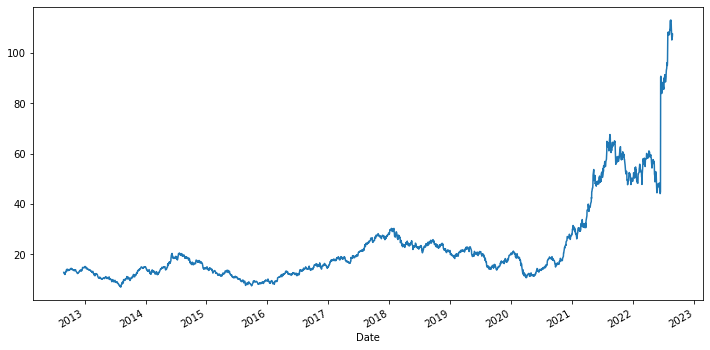

In [11]:
nifty_stock_data['TATASTEEL.NS'].plot(figsize=(12,6))
plt.show()

In [12]:
# for HDFC LIFE AND SBILIFE not enough data for 10 years, therefore removing the 2 stocks from the stock list
# after analysis, also removing TATASTEEL as it seems its price time series is not correct

In [13]:
nifty_stock_data_updated = nifty_stock_data.drop(['HDFCLIFE.NS', 'SBILIFE.NS', 'TATASTEEL.NS'], axis=1)

In [14]:
nifty_stock_data_updated.head()

,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-29,103.862373,602.115845,343.256500,192.877014,1244.552002,745.323181,96.962402,211.020767,69.505486,211.138870,...,318.785095,109.434669,228.293030,554.325745,171.677658,208.698776,1657.409668,69.102036,124.498543,5287.799805
2012-08-30,108.654556,609.127136,342.709564,191.892181,1249.415771,767.096741,98.887451,211.499756,68.686371,211.809540,...,316.875427,113.892494,231.569748,564.167725,163.072189,209.169754,1652.825562,70.972855,126.156685,5315.049805
2012-08-31,107.942848,603.652588,337.549835,187.829941,1238.692627,775.669922,98.032379,215.810760,66.090904,216.785645,...,315.154510,113.455460,229.173370,554.511658,164.213409,207.568375,1634.825806,71.032265,123.968658,5258.500000
2012-09-03,110.315216,603.748535,338.504822,185.140717,1273.390015,780.102600,97.882881,214.983398,67.285004,218.235214,...,314.400055,113.979874,225.847763,552.076904,166.670639,210.959549,1607.609253,70.913475,124.515648,5253.750000
2012-09-04,110.647362,605.141296,342.417450,185.273270,1261.862671,785.655579,98.490288,217.509033,68.479134,219.230438,...,311.995422,115.028801,229.711319,553.314819,168.850296,212.560928,1611.855957,71.240128,124.122459,5274.000000


In [15]:
# calculating daily percentage change of stocks and removing the null values
data_pct_change = nifty_stock_data_updated.pct_change().dropna()

In [16]:
data_pct_change.head(10)

,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,BRITANNIA.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS,^NSEI
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-30,0.046140,0.011644,-0.001593,-0.005106,0.003908,0.029214,0.019854,0.002270,-0.011785,0.003176,...,-0.005990,0.040735,0.014353,0.017755,-0.050126,0.002257,-0.002766,0.027073,0.013319,0.005153
2012-08-31,-0.006550,-0.008988,-0.015056,-0.021169,-0.008583,0.011176,-0.008647,0.020383,-0.037787,0.023493,...,-0.005431,-0.003837,-0.010348,-0.017116,0.006998,-0.007656,-0.010890,0.000837,-0.017344,-0.010640
2012-09-03,0.021978,0.000159,0.002829,-0.014317,0.028011,0.005715,-0.001525,-0.003834,0.018068,0.006687,...,-0.002394,0.004622,-0.014511,-0.004391,0.014964,0.016338,-0.016648,-0.001672,0.004412,-0.000903
2012-09-04,0.003011,0.002307,0.011559,0.000716,-0.009052,0.007118,0.006205,0.011748,0.017747,0.004560,...,-0.007648,0.009203,0.017107,0.002242,0.013078,0.007591,0.002642,0.004606,-0.003158,0.003854
2012-09-05,-0.008576,0.007936,-0.011332,-0.049116,-0.001518,-0.001364,-0.006689,0.032433,-0.004324,-0.007402,...,-0.017077,0.015577,-0.026187,0.017638,0.013091,-0.013960,0.002964,0.004168,-0.002617,-0.009158
2012-09-06,-0.012543,-0.006771,0.013393,0.019834,-0.001885,-0.010334,-0.002531,-0.022300,0.005355,0.004176,...,0.001691,0.014590,0.019021,0.008135,0.007573,-0.010337,0.009641,0.010793,0.042392,0.002430
2012-09-07,-0.010512,0.025684,0.018985,0.029672,0.028230,0.000383,0.025185,0.015470,-0.006335,-0.014852,...,0.020107,0.007375,0.043982,0.008069,0.024636,0.032471,0.026638,-0.008624,0.000927,0.019796
2012-09-10,-0.002213,-0.002860,-0.008447,-0.024467,0.012528,-0.014042,-0.023259,0.019727,-0.007534,-0.002713,...,0.028514,-0.009151,0.023017,-0.010998,0.024684,0.033429,0.010828,0.016156,-0.003574,0.003997
2012-09-11,-0.002218,-0.001938,0.010030,-0.000105,0.003510,-0.029132,0.023574,0.002107,0.019562,-0.012295,...,0.002194,-0.004063,0.003616,0.015458,0.014204,0.010002,0.000570,0.010599,-0.004250,0.004950


In [17]:
# function to calculate BETA of the stock using Ordinary Least Squares method
def calculate_beta(y, x):
    model = sm.OLS(y, x)
    results = model.fit()
    return results.params[0]

In [18]:
# creating a new DataFrame named beta to store the beta of nifty50 stocks
beta = pd.DataFrame(index=[0])

In [19]:
# calculating beta from 7years of data instead of whole 10 years. Can be thought of as 70% training data
for ticker in data_pct_change.columns:
    beta[ticker] = calculate_beta(data_pct_change.loc[:'2019', ticker], data_pct_change.loc[:'2019', '^NSEI'])

In [20]:
beta = beta.T
beta.columns = ['beta']

In [21]:
beta

,beta
ADANIPORTS.NS,1.279162
APOLLOHOSP.NS,0.659608
ASIANPAINT.NS,0.878376
AXISBANK.NS,1.429221
BAJAJ-AUTO.NS,0.816250
BAJAJFINSV.NS,0.917318
BAJFINANCE.NS,1.100013
BHARTIARTL.NS,0.889362
BPCL.NS,1.150616
BRITANNIA.NS,0.631715


<AxesSubplot:>

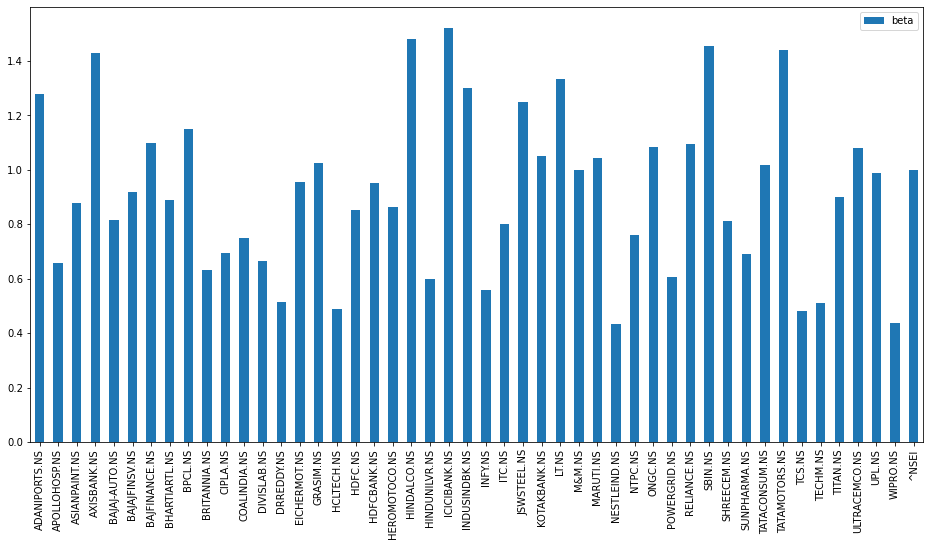

In [22]:
beta.plot.bar(figsize=(16,8))

In [23]:
# categorizing stocks with beta less than 0.7 as low beta stocks  
low_beta = beta[beta.values < 0.7].index

In [24]:
low_beta

Index(['APOLLOHOSP.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'DIVISLAB.NS',
       'DRREDDY.NS', 'HCLTECH.NS', 'HINDUNILVR.NS', 'INFY.NS', 'NESTLEIND.NS',
       'POWERGRID.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS'],
      dtype='object')

In [25]:
# function to calculate the performance of portfolio from 2020 onwards, can be considered as test data
def plot_performance(stock_list, strategy_name):
    stock_returns = data_pct_change.loc['2020': , stock_list]
    (stock_returns + 1).cumprod().plot(figsize=(15,7), legend="left")
    plt.title(strategy_name)
    plt.show()
    
    nifty = data_pct_change.loc['2020': , '^NSEI']
    portfolio = stock_returns.mean(axis=1)
    plt.title(strategy_name + ' Portfolio Performance')
    (portfolio + 1).cumprod().plot(figsize=(15,7), label=strategy_name, color='purple')
    (nifty + 1).cumprod().plot(figsize=(15,7), label='Nifty', color='blue')
    plt.legend()
    plt.show()
    print("Portfolio Returns: ", (((portfolio + 1).cumprod()[-1]) - 1) * 100) 
    print("Nifty Returns: ", (((nifty + 1).cumprod()[-1]) - 1) * 100) 
    return portfolio

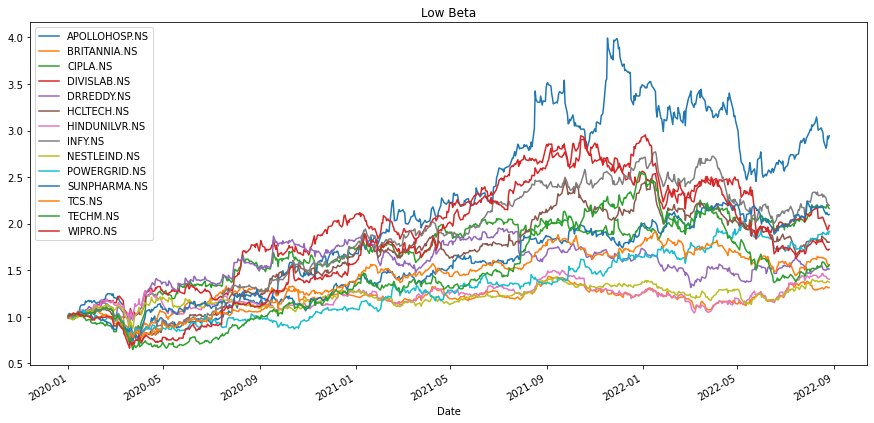

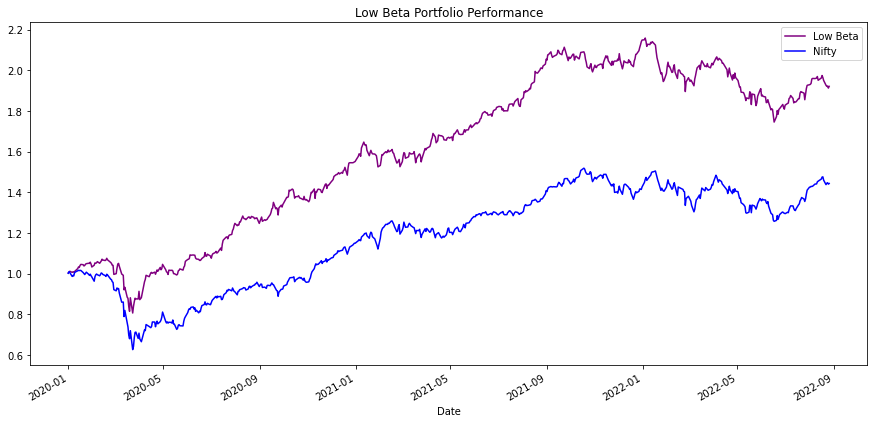

Portfolio Returns:  92.12531432373538
Nifty Returns:  44.298576308337175


In [26]:
# calculating performance of Low Beta stocks
p_low_beta = plot_performance(low_beta, 'Low Beta')

In [27]:
# From the above plot, it can be inferred that portfolio of low beta stocks has easily beaten nifty returns over a period of 3 years. 
# And another thing can be inferred is that portfolio didn't fall much as compared to nifty but grew more.

In [28]:
# categorizing stocks with beta more than 1.2 as high beta stocks  
high_beta = beta[beta.values > 1.2].index
high_beta

Index(['ADANIPORTS.NS', 'AXISBANK.NS', 'HINDALCO.NS', 'ICICIBANK.NS',
       'INDUSINDBK.NS', 'JSWSTEEL.NS', 'LT.NS', 'SBIN.NS', 'TATAMOTORS.NS'],
      dtype='object')

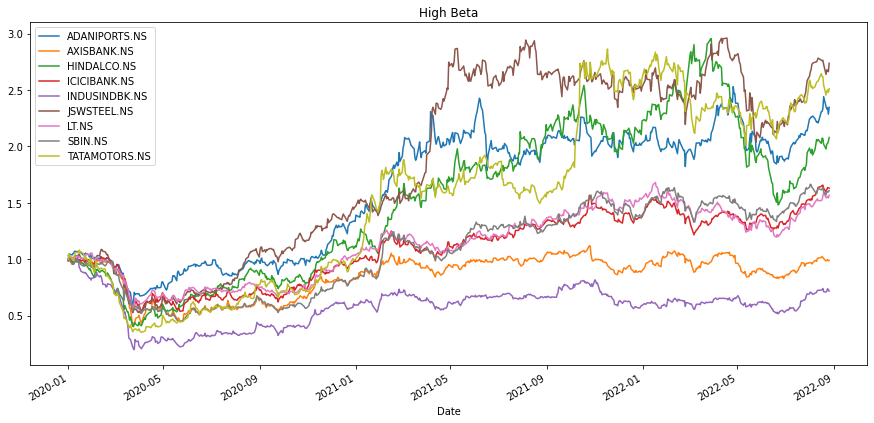

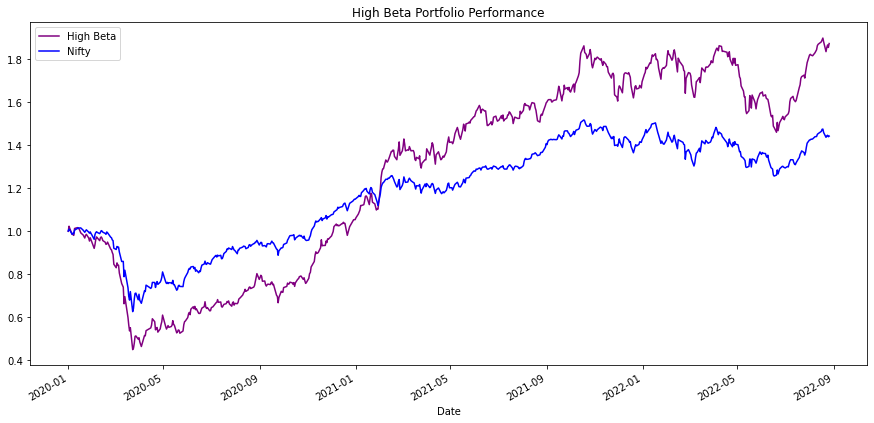

Portfolio Returns:  87.40605655822738
Nifty Returns:  44.298576308337175


In [29]:
# # calculating performance of High Beta stocks
p_high_beta = plot_performance(high_beta, "High Beta")

In [30]:
# From the plot, it can be inferred that portfolio of high beta stocks has beaten the nifty returns over a period of 3 years.
# But it can also be inferred that portfolio of high beta stocks fall more as compared to nifty but also grew more. 

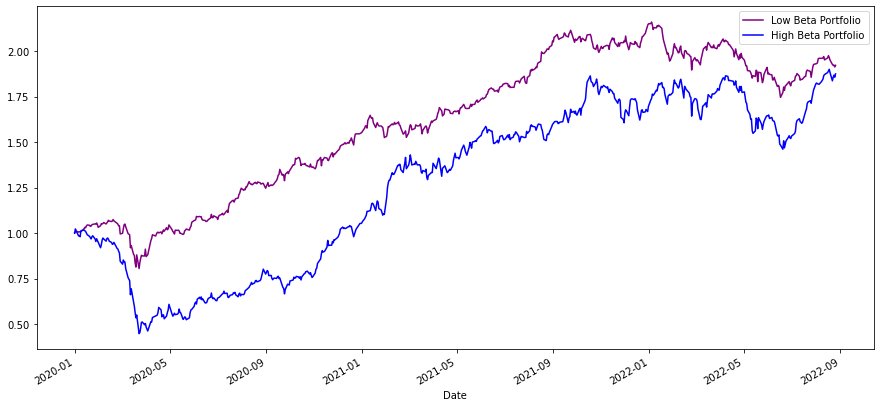

In [31]:
# Plotting portlofio of low beta vs high beta
(p_low_beta + 1).cumprod().plot(figsize=(15,7), label="Low Beta Portfolio", color='purple')
(p_high_beta + 1).cumprod().plot(figsize=(15,7), label="High Beta Portfolio", color='blue')
plt.legend()
plt.show()

In [32]:
# From the above plot it can be inferred that portfolio of High Beta stocks have never beaten portfolio of Low Beta stocks over a period of 3 years.
# Also it can be seen Standard Deviation of portfolio of High Beta stocks is more than Low Beta stocks. 

In [33]:
print("Standard Deviation of Portfolio of Low Beta Stocks is: ", round(p_low_beta.std(), 3))
print("Standard Deviation of Portfolio of High Beta Stocks is: ", round(p_high_beta.std(), 3))

Standard Deviation of Portfolio of Low Beta Stocks is:  0.013
Standard Deviation of Portfolio of High Beta Stocks is:  0.021


In [34]:
# minimum beta value
min(beta['beta'])

0.43242329851517336

In [35]:
low_beta_threshold = [ 0.5, 0.6, 0.7, 0.8]

In [36]:
# function to calculate the performace of low beta portfolio based on different threshold value
def mutiple_low_beta():
    for beta_val in low_beta_threshold:
        print("Beta Value: ", beta_val)
        low_beta = beta[beta.values < beta_val].index
        plot_performance(low_beta, 'Low Beta')
        print("-----------------------------------------------------------------------------------")

Beta Value:  0.5


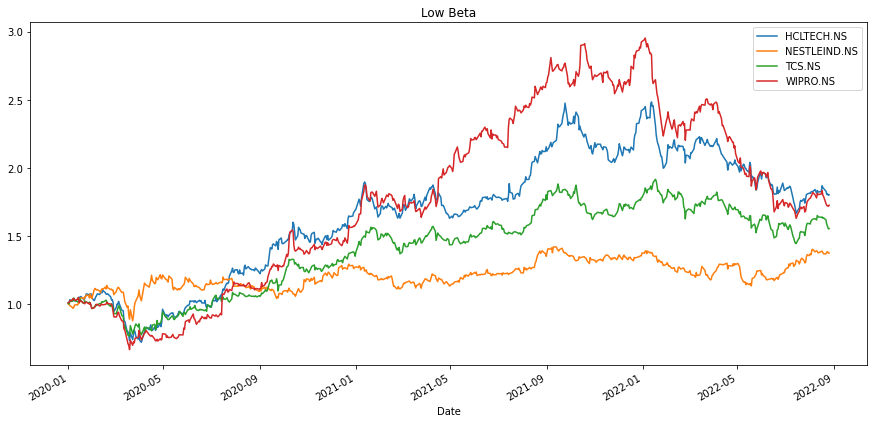

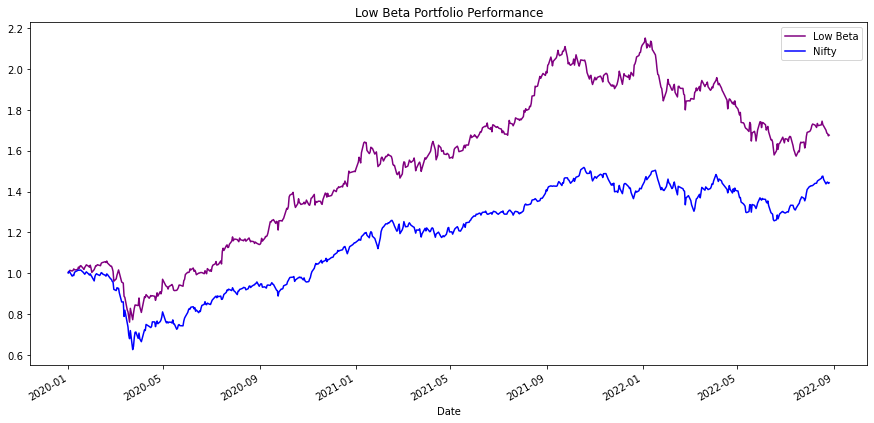

Portfolio Returns:  67.65606736673595
Nifty Returns:  44.298576308337175
-----------------------------------------------------------------------------------
Beta Value:  0.6


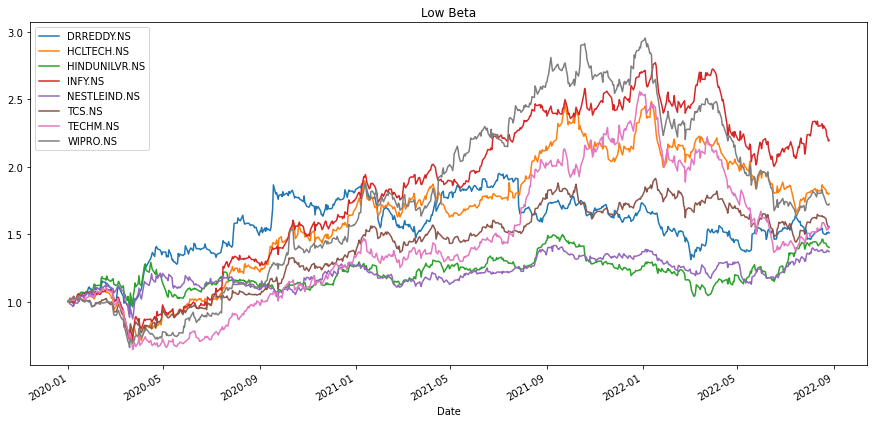

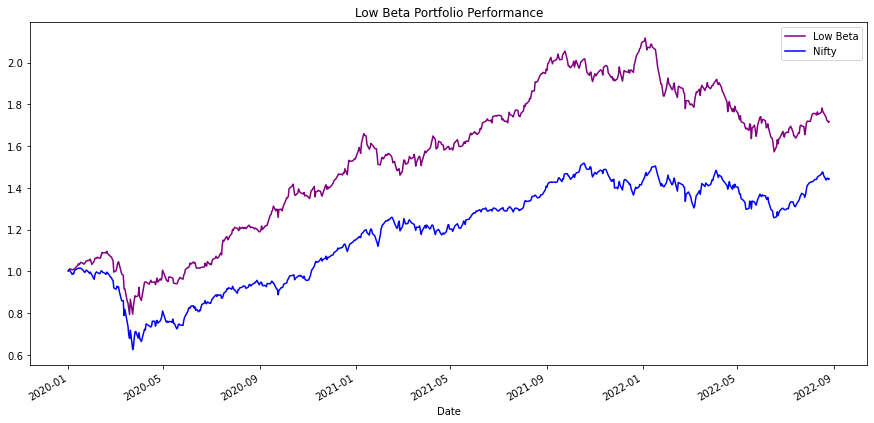

Portfolio Returns:  71.74475827708339
Nifty Returns:  44.298576308337175
-----------------------------------------------------------------------------------
Beta Value:  0.7


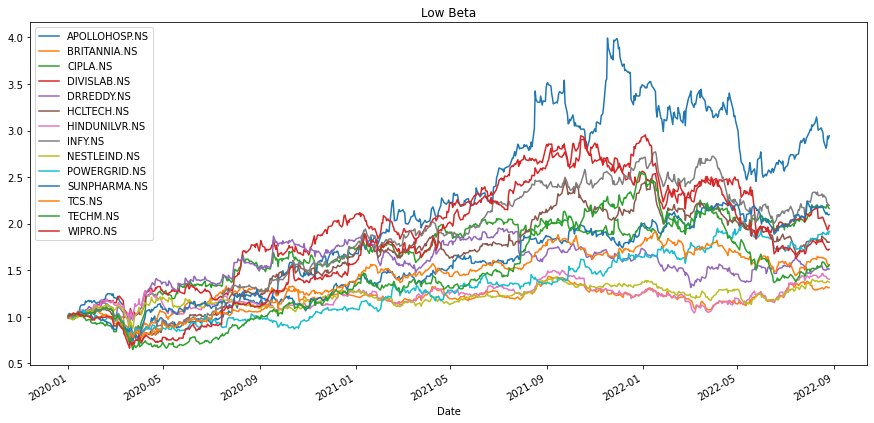

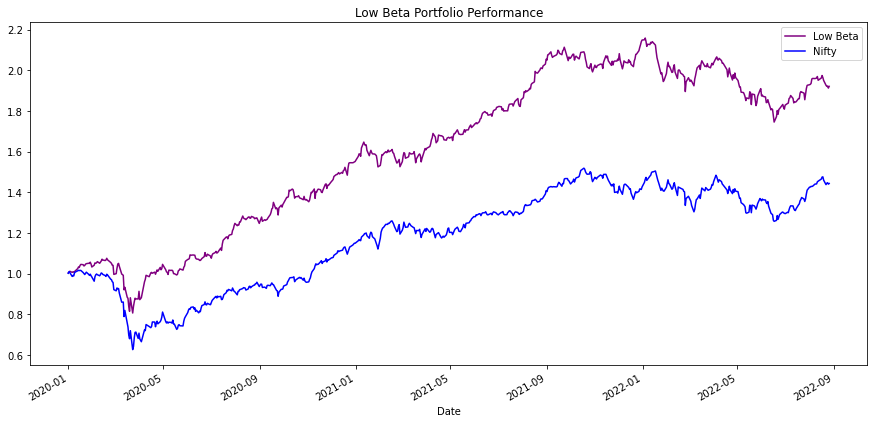

Portfolio Returns:  92.12531432373538
Nifty Returns:  44.298576308337175
-----------------------------------------------------------------------------------
Beta Value:  0.8


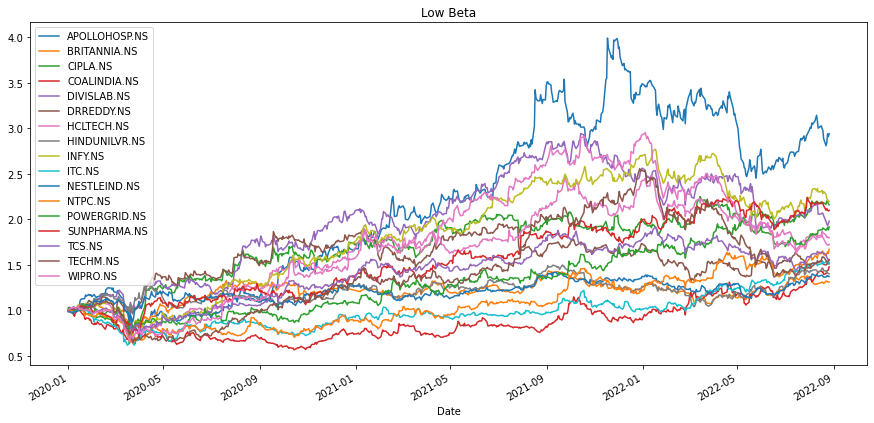

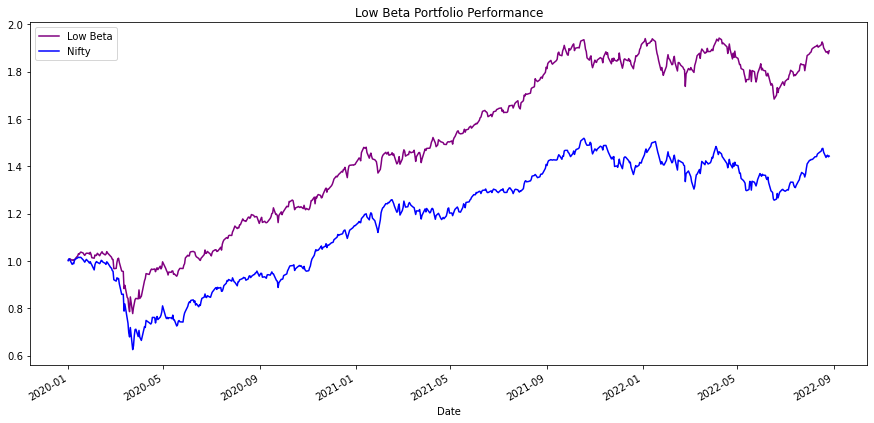

Portfolio Returns:  88.8279097910532
Nifty Returns:  44.298576308337175
-----------------------------------------------------------------------------------


In [37]:
mutiple_low_beta()

In [38]:
# From the above plots, it can be inferred that 0.7 is the best value of threshold for low beta stocks as it gives the highest portfolio returns for a given period.

In [39]:
# maximum beta value
max(beta['beta'])

1.5219168399669027

In [40]:
high_beta_threshold = [ 1.2, 1.3, 1.4, 1.5]

In [41]:
# function to calculate the performace of high beta portfolio based on different threshold value
def multiple_high_beta():
    for beta_val in high_beta_threshold:
        print("Beta Value: ", beta_val)
        high_beta = beta[beta.values > beta_val].index
        plot_performance(high_beta, 'High Beta')
        print("-----------------------------------------------------------------------------------")

Beta Value:  1.2


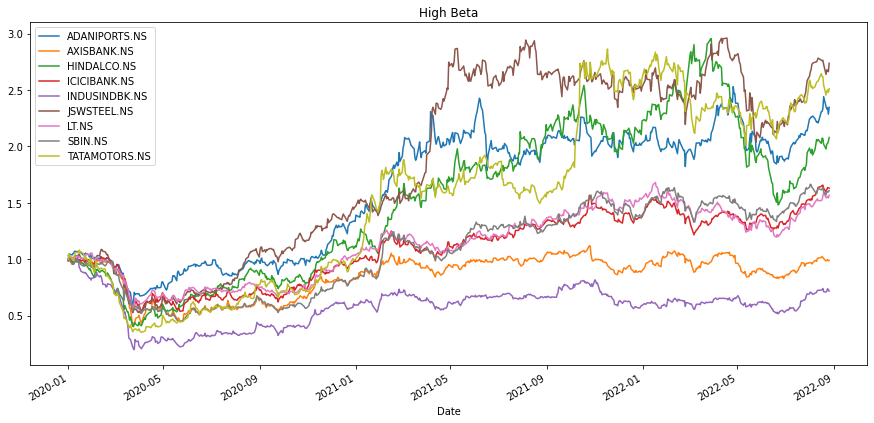

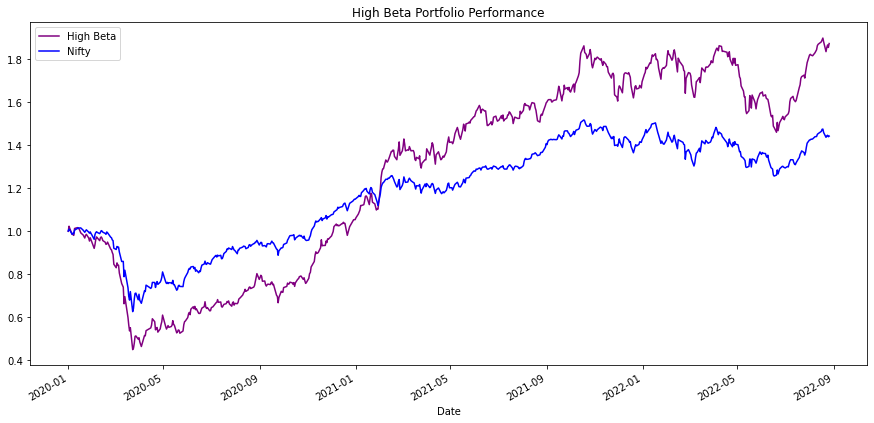

Portfolio Returns:  87.40605655822738
Nifty Returns:  44.298576308337175
-----------------------------------------------------------------------------------
Beta Value:  1.3


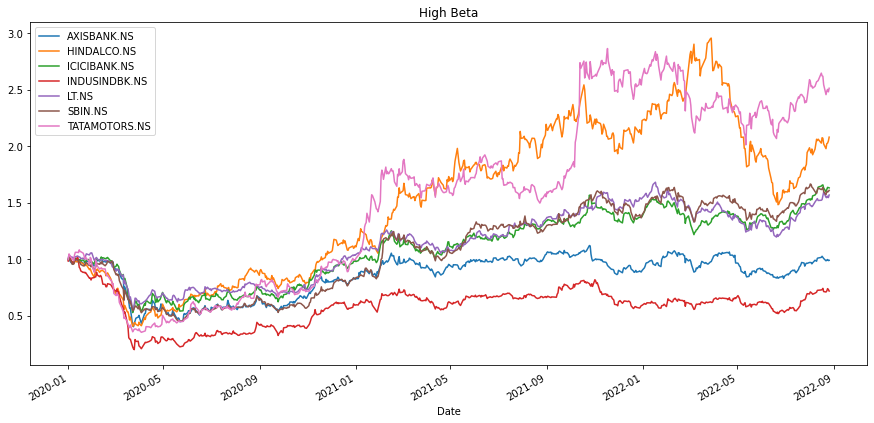

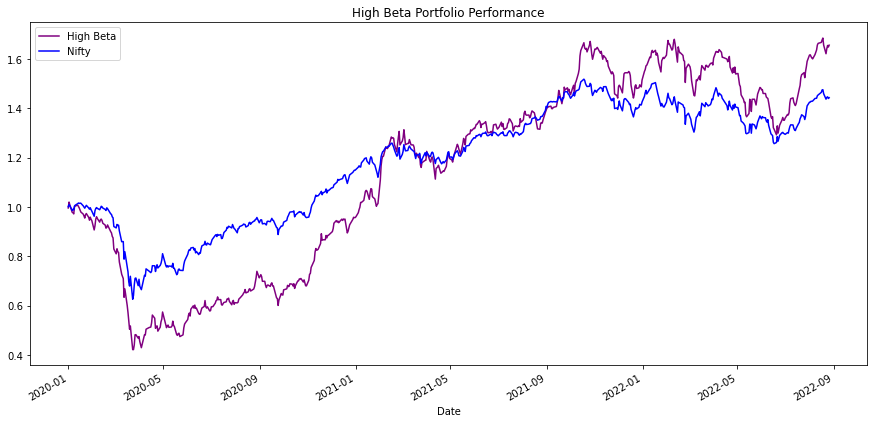

Portfolio Returns:  65.64485416620872
Nifty Returns:  44.298576308337175
-----------------------------------------------------------------------------------
Beta Value:  1.4


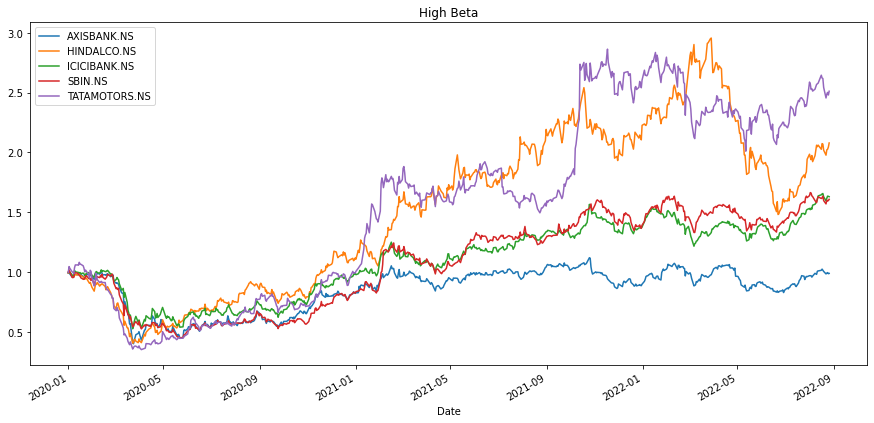

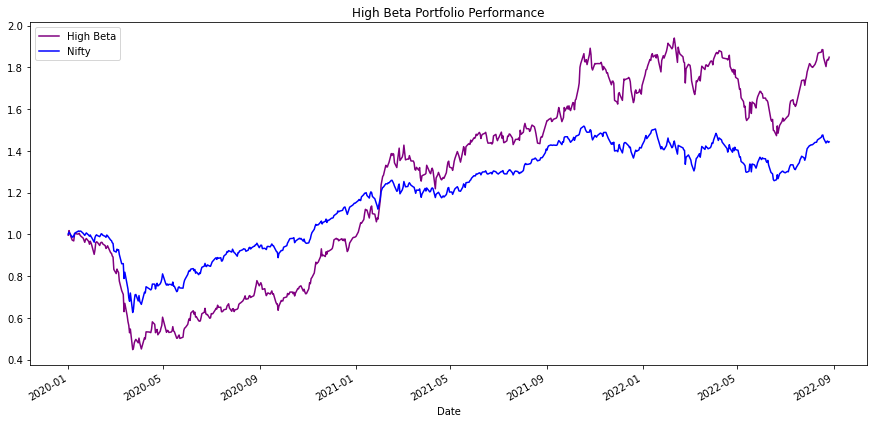

Portfolio Returns:  84.84355664842195
Nifty Returns:  44.298576308337175
-----------------------------------------------------------------------------------
Beta Value:  1.5


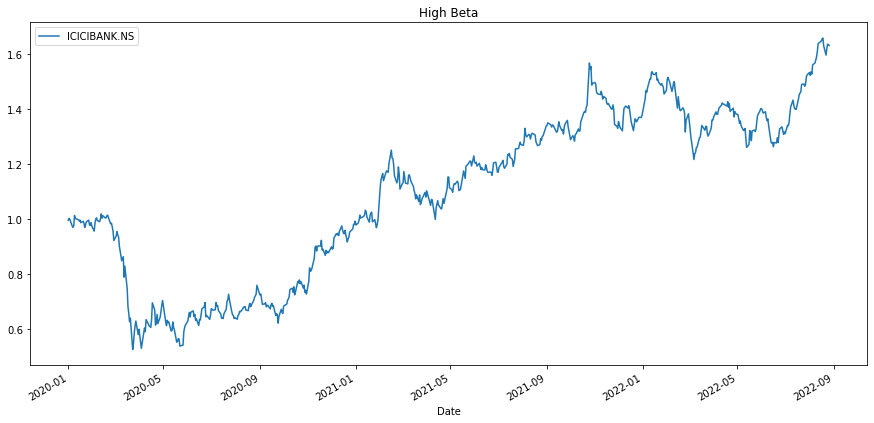

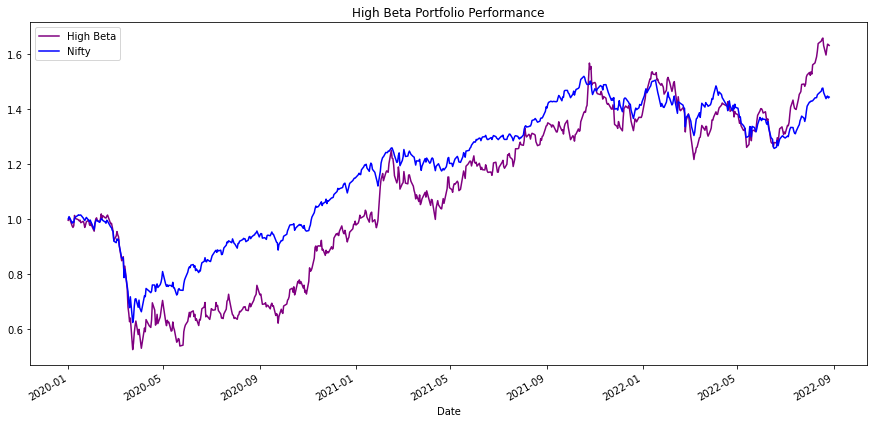

Portfolio Returns:  63.04343503622307
Nifty Returns:  44.298576308337175
-----------------------------------------------------------------------------------


In [42]:
multiple_high_beta()

In [43]:
# From the above plots, it can be inferred that 1.2 is the best value of threshold for high beta stocks as it gives the highest portfolio returns for a given period.

In [44]:
# Other Alpha's for the strategy are ROE & ROCE. (Beta was the 1st alpha)

In [45]:
# Setting the ROE & ROCE threshold value
roe_threshold = 15
roce_threshold = 15

In [46]:
# Reading nifty50 ROE & ROCE data from csv which was created from scraping Screener.in. Refer Scraping_Fundamental_Ratios.ipynb
nifty_fundamental_data = pd.read_csv('Nifty_50_fundamental.csv', index_col=0)

In [47]:
nifty_fundamental_data.head()

,ROCE,ROE
ADANIPORTS.NS,11.20,14.7
APOLLOHOSP.NS,17.80,16.6
ASIANPAINT.NS,29.70,23.2
AXISBANK.NS,5.15,12.7
BAJAJ-AUTO.NS,23.40,19.0


In [48]:
high_roe = nifty_fundamental_data[nifty_fundamental_data.ROE > roe_threshold]['ROE'].index

In [49]:
high_roe

Index(['APOLLOHOSP.NS', 'ASIANPAINT.NS', 'BAJAJ-AUTO.NS', 'BAJFINANCE.NS',
       'BPCL.NS', 'BRITANNIA.NS', 'COALINDIA.NS', 'DIVISLAB.NS', 'HCLTECH.NS',
       'HDFCBANK.NS', 'HINDALCO.NS', 'HINDUNILVR.NS', 'INFY.NS', 'ITC.NS',
       'JSWSTEEL.NS', 'NESTLEIND.NS', 'ONGC.NS', 'POWERGRID.NS',
       'TATASTEEL.NS', 'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'ULTRACEMCO.NS',
       'UPL.NS', 'WIPRO.NS'],
      dtype='object')

In [50]:
high_roce = nifty_fundamental_data[nifty_fundamental_data.ROCE > roce_threshold]['ROCE'].index

In [51]:
high_roce

Index(['APOLLOHOSP.NS', 'ASIANPAINT.NS', 'BAJAJ-AUTO.NS', 'BPCL.NS',
       'BRITANNIA.NS', 'CIPLA.NS', 'COALINDIA.NS', 'DIVISLAB.NS',
       'EICHERMOT.NS', 'HCLTECH.NS', 'HEROMOTOCO.NS', 'HINDALCO.NS',
       'HINDUNILVR.NS', 'INFY.NS', 'ITC.NS', 'JSWSTEEL.NS', 'NESTLEIND.NS',
       'ONGC.NS', 'SBILIFE.NS', 'SHREECEM.NS', 'SUNPHARMA.NS', 'TATASTEEL.NS',
       'TCS.NS', 'TECHM.NS', 'TITAN.NS', 'UPL.NS', 'WIPRO.NS'],
      dtype='object')

In [52]:
low_beta

Index(['APOLLOHOSP.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'DIVISLAB.NS',
       'DRREDDY.NS', 'HCLTECH.NS', 'HINDUNILVR.NS', 'INFY.NS', 'NESTLEIND.NS',
       'POWERGRID.NS', 'SUNPHARMA.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS'],
      dtype='object')

In [53]:
# Filtering stocks which have low Beta and high ROE
filtered_stocks_roe = low_beta & high_roe
filtered_stocks_roe

C:\Users\Param\AppData\Local\Temp/ipykernel_3180/764207647.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  filtered_stocks_roe = low_beta & high_roe


Index(['APOLLOHOSP.NS', 'BRITANNIA.NS', 'DIVISLAB.NS', 'HCLTECH.NS',
       'HINDUNILVR.NS', 'INFY.NS', 'NESTLEIND.NS', 'POWERGRID.NS', 'TCS.NS',
       'TECHM.NS', 'WIPRO.NS'],
      dtype='object')

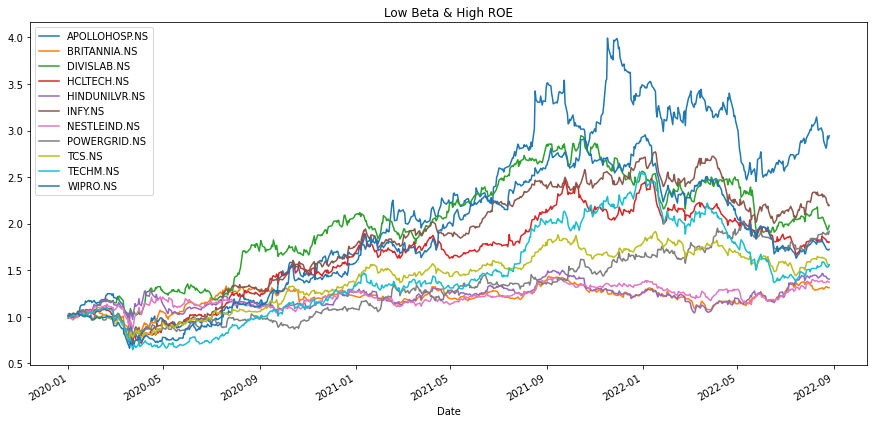

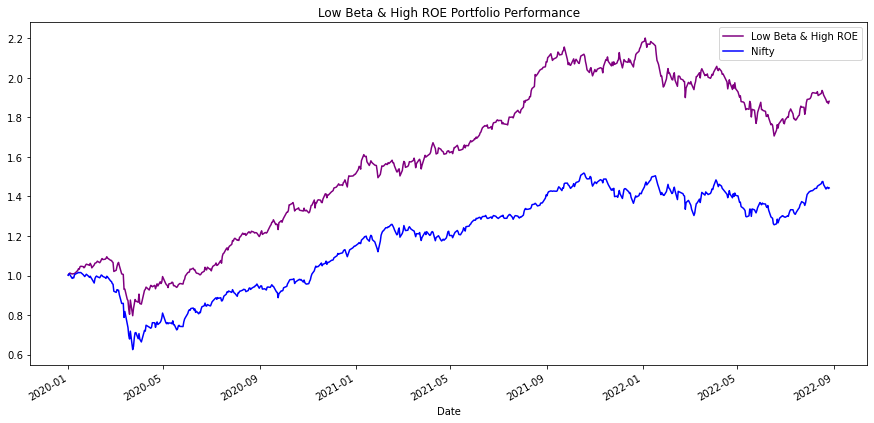

Portfolio Returns:  88.13688639986815
Nifty Returns:  44.298576308337175


In [54]:
# calculating the performance of Portfolio consisting of Low Beta and High ROE stocks
p_high_roe = plot_performance(filtered_stocks_roe, 'Low Beta & High ROE')

In [55]:
# Filtering stocks which have low Beta and high ROCE
filtered_stocks_roce = low_beta & high_roce
filtered_stocks_roce

C:\Users\Param\AppData\Local\Temp/ipykernel_3180/27653918.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  filtered_stocks_roce = low_beta & high_roce


Index(['APOLLOHOSP.NS', 'BRITANNIA.NS', 'CIPLA.NS', 'DIVISLAB.NS',
       'HCLTECH.NS', 'HINDUNILVR.NS', 'INFY.NS', 'NESTLEIND.NS',
       'SUNPHARMA.NS', 'TCS.NS', 'TECHM.NS', 'WIPRO.NS'],
      dtype='object')

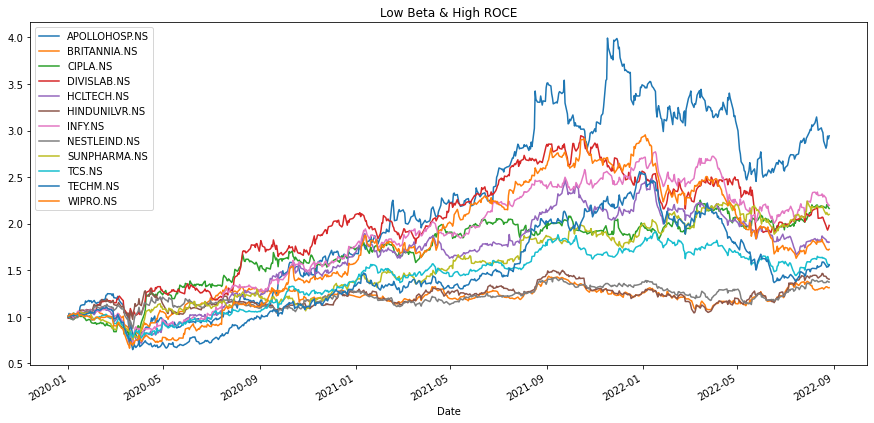

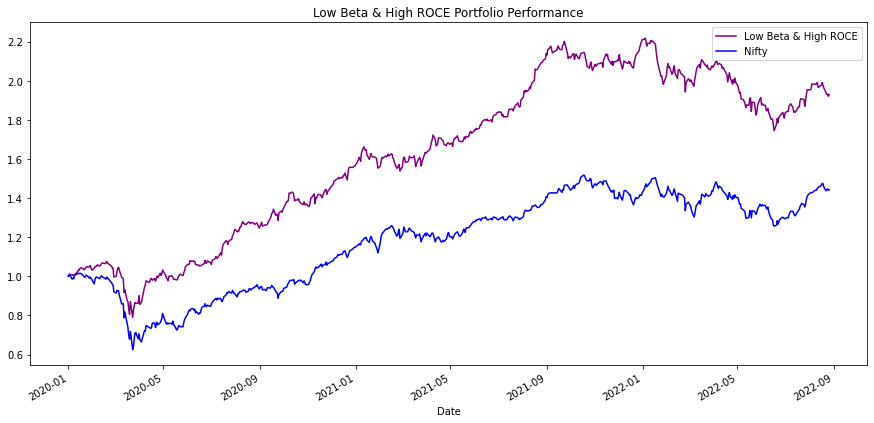

Portfolio Returns:  92.9315569174618
Nifty Returns:  44.298576308337175


In [56]:
# calculating the performance of Portfolio consisting of Low Beta and High ROCE stocks
p_high_roce = plot_performance(filtered_stocks_roce, 'Low Beta & High ROCE')

In [57]:
# Filtering stocks which have low Beta, high ROCE & high ROE
filtered_stocks_roe_roce = low_beta & high_roe & high_roce
filtered_stocks_roe_roce

C:\Users\Param\AppData\Local\Temp/ipykernel_3180/2416309408.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  filtered_stocks_roe_roce = low_beta & high_roe & high_roce


Index(['APOLLOHOSP.NS', 'BRITANNIA.NS', 'DIVISLAB.NS', 'HCLTECH.NS',
       'HINDUNILVR.NS', 'INFY.NS', 'NESTLEIND.NS', 'TCS.NS', 'TECHM.NS',
       'WIPRO.NS'],
      dtype='object')

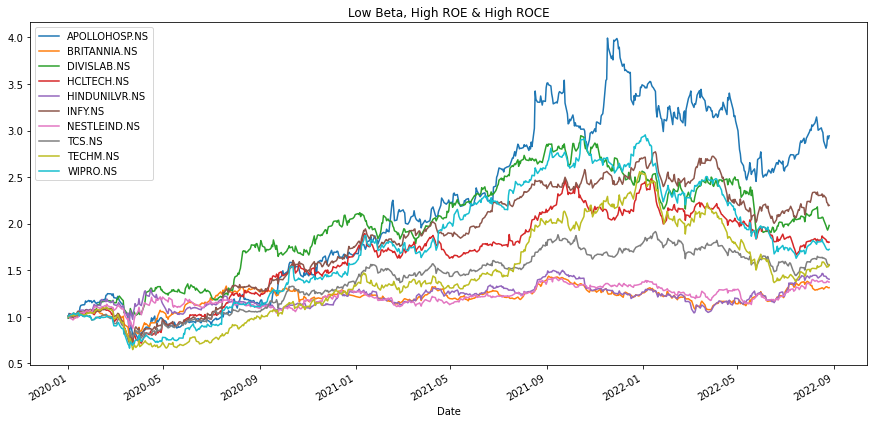

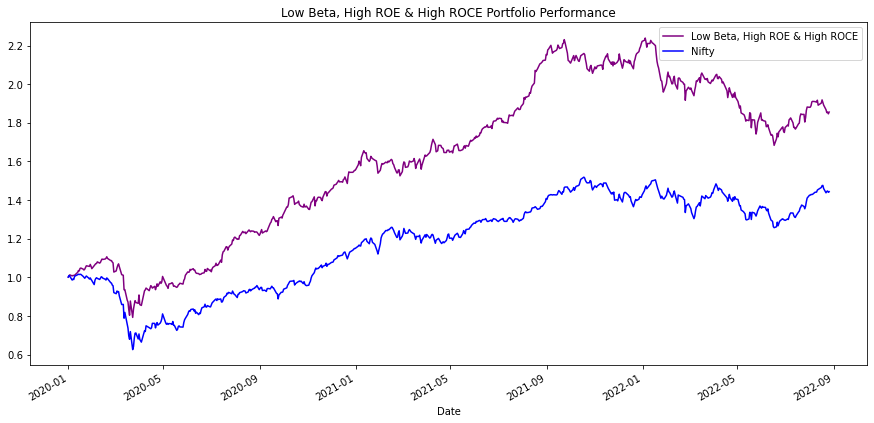

Portfolio Returns:  85.55592495346251
Nifty Returns:  44.298576308337175


In [58]:
# calculating the performance of Portfolio consisting of Low Beta, High ROCE & High ROE stocks
p_high_roe_roce = plot_performance(filtered_stocks_roe_roce, 'Low Beta, High ROE & High ROCE')

In [59]:
# From the above plots, it can be concluded that portfolio of Low Beta and high ROCE stocks give the highest returns. 

Start date,2020-01-01
End date,2022-08-26
Total months,31
,Backtest
Annual return,28.5%
Cumulative returns,92.9%
Annual volatility,20.9%
Sharpe ratio,1.31
Calmar ratio,1.07
Stability,0.82
Max drawdown,-26.6%


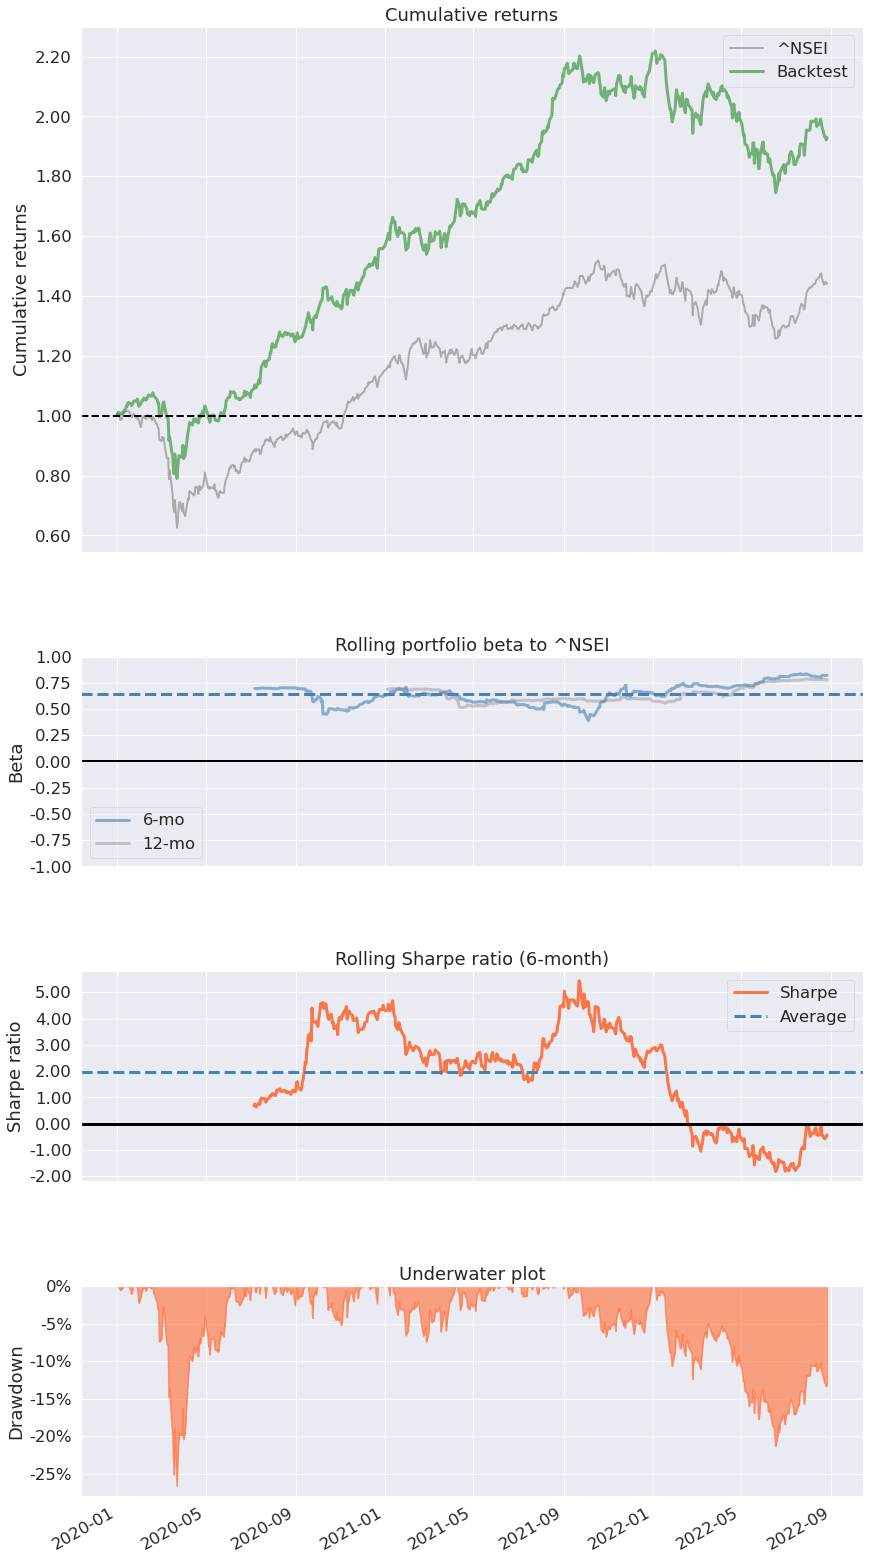

In [60]:
pf.create_simple_tear_sheet(p_high_roce, benchmark_rets=data_pct_change.loc['2020': , '^NSEI'])

In [61]:
high_beta

Index(['ADANIPORTS.NS', 'AXISBANK.NS', 'HINDALCO.NS', 'ICICIBANK.NS',
       'INDUSINDBK.NS', 'JSWSTEEL.NS', 'LT.NS', 'SBIN.NS', 'TATAMOTORS.NS'],
      dtype='object')

In [62]:
filtered_stocks_high_beta_roe = high_beta & high_roe

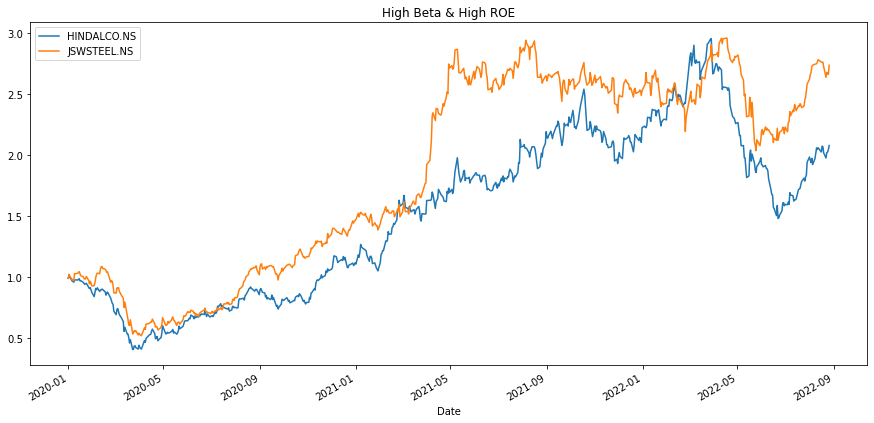

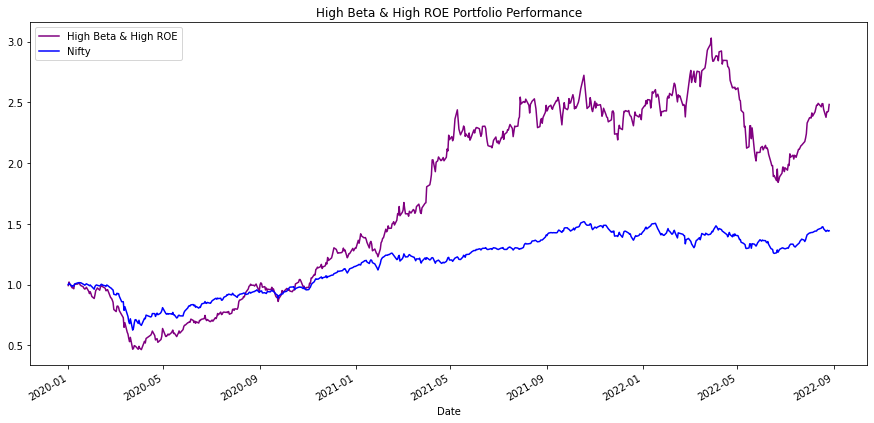

Portfolio Returns:  148.2383506884563
Nifty Returns:  44.298576308337175


In [63]:
p_high_beta_roe = plot_performance(filtered_stocks_high_beta_roe, 'High Beta & High ROE')

In [64]:
filtered_stocks_high_beta_roce = high_beta & high_roce

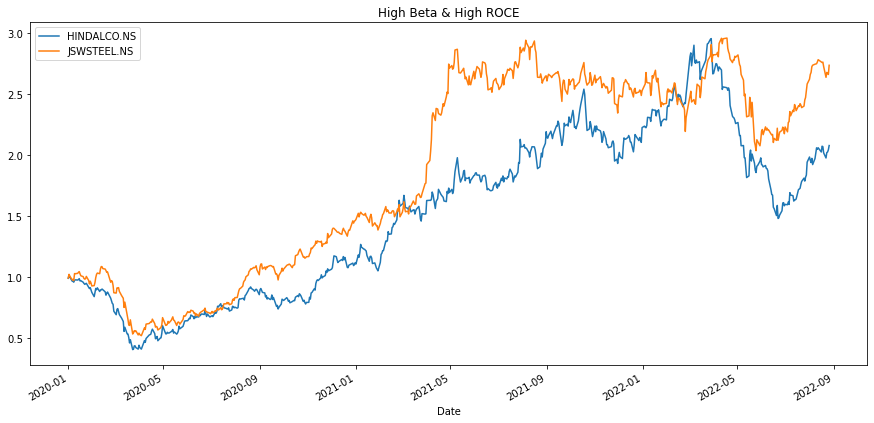

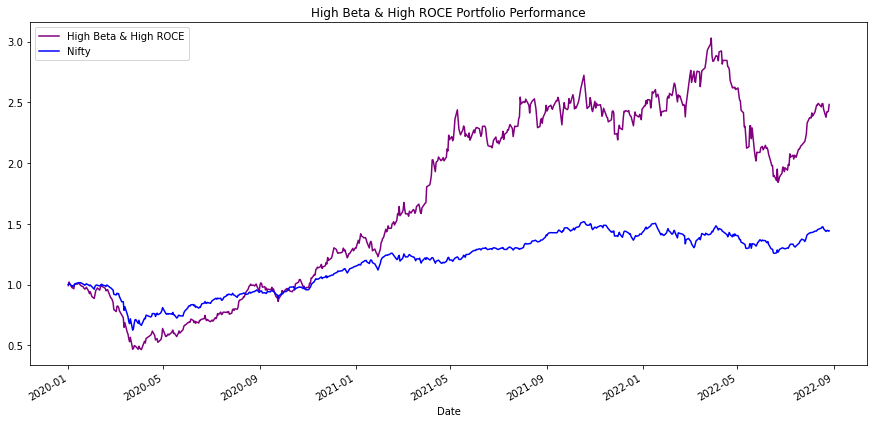

Portfolio Returns:  148.2383506884563
Nifty Returns:  44.298576308337175


In [65]:
p_high_beta_roce = plot_performance(filtered_stocks_high_beta_roce, 'High Beta & High ROCE')

Start date,2020-01-01
End date,2022-08-26
Total months,31
,Backtest
Annual return,41.4%
Cumulative returns,148.2%
Annual volatility,42.7%
Sharpe ratio,1.03
Calmar ratio,0.76
Stability,0.78
Max drawdown,-54.5%


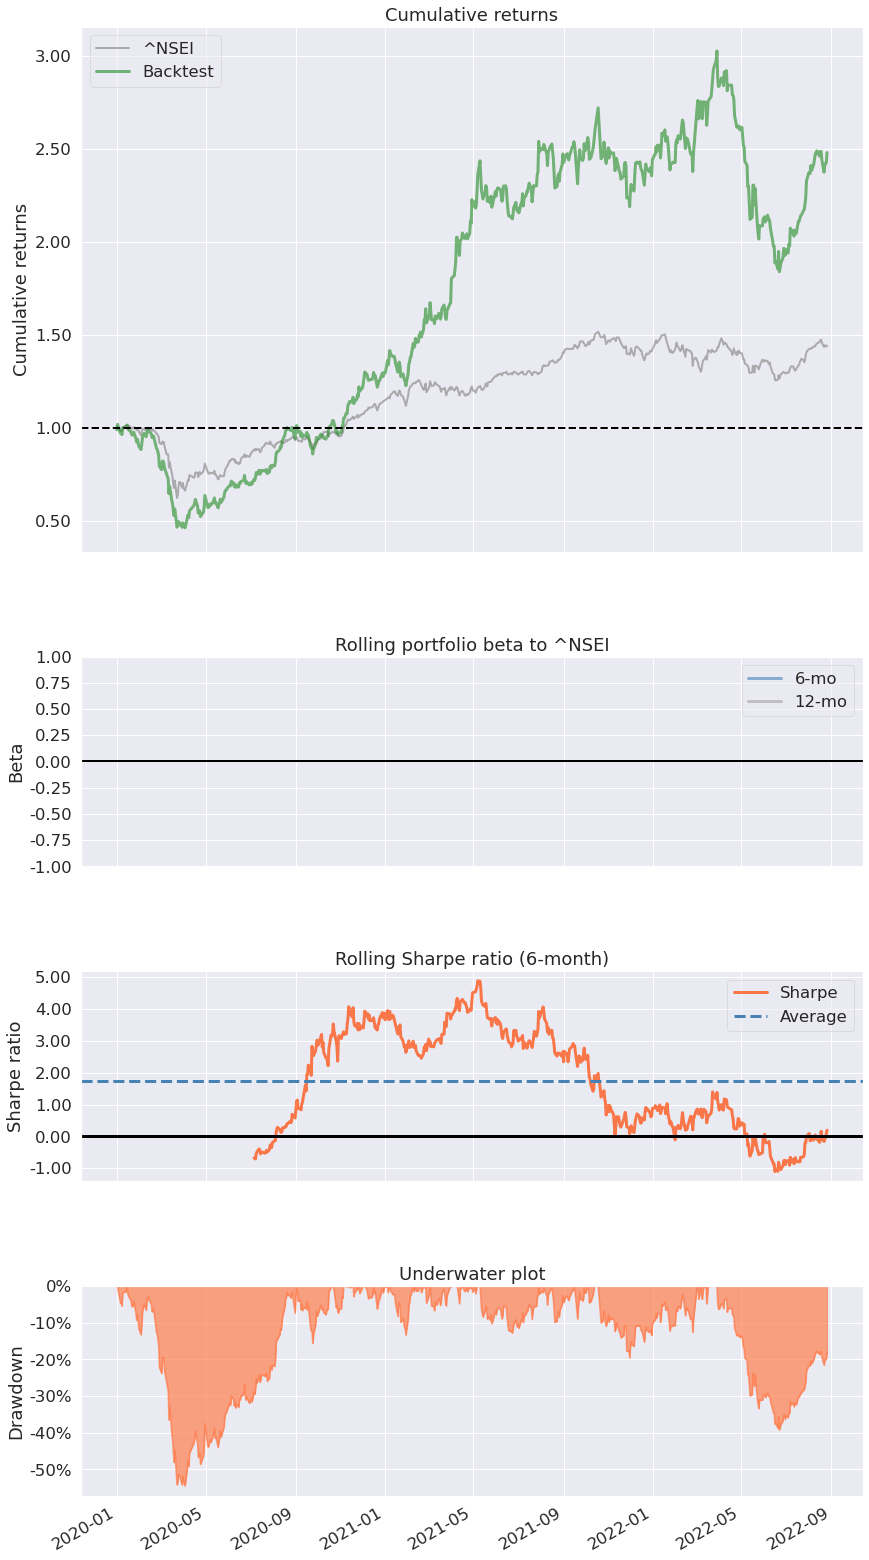

In [66]:
pf.create_simple_tear_sheet(p_high_beta_roce, benchmark_rets=data_pct_change.loc['2020': , '^NSEI'])